C:\Users\samsu\anaconda3\envs\WebApp_Fatsai\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


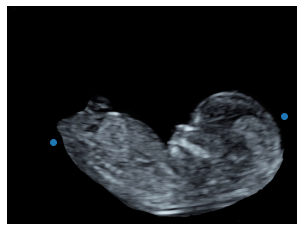

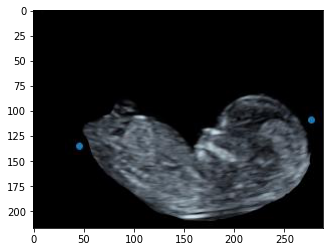

In [24]:
from fastai.vision import *
import matplotlib.pyplot as plt
learn = load_learner('densenet121_hp/')
img = open_image('data/class_result/orig/image_with_mask5_6.jpg')

def get_ip(img,pts):
    return ImagePoints(FlowField(img.size, pts), scale=True)

def show_eye_predictions(model, image) -> None:
    prediction = model.predict(image)
    cr_locations = prediction[1]
    coord = cr_locations[0]
    coord1 = cr_locations[1]
    r1 = (float(coord[0])+1)/2
    c1 = (float(coord[1])+1)/2
    r2 = (float(coord1[0])+1)/2
    c2 = (float(coord1[1])+1)/2
    r1_r = (r1 * image.size[0])
    r2_r = (r2 * image.size[0])
    c1_r = (c1 * image.size[1])
    c2_r = (c2 * image.size[1])
    eye_locs = tensor(
      [ [float(r1_r), float(c1_r) ], 
        [float(r2_r), float(c2_r) ]  ]
       )
    
    eye_locs1 = tensor(
      [ [float(c1_r), float(r1_r) ], 
        [float(c2_r), float(r2_r) ]  ]
       )
    im = plt.imread('data/class_result/orig/image_with_mask5_6.jpg')
    implot = plt.imshow(im)
    x, y = eye_locs1.T
    plt.scatter(x,y)
    plt.axis('off')
    plt.savefig('my_plot.jpg',  bbox_inches='tight',pad_inches = 0)
    plt.show()
    im = plt.imread('my_plot.jpg')
    implot = plt.imshow(im)
    plt.show()
    
    #g.save('temp.jpg')
show_eye_predictions(learn, img)